In [34]:
import numpy as np

#RELU Function

def RELU(Zl):
    #Al = np.maximum(0.01*Zl,Zl)
    Al = np.tanh(Zl)
    return Al

#Sigmoid Function

def sigmoid(Zl):
    Al = 1/(1+np.exp(-Zl))
    return Al

#initialization of parameters

def initialize_parameters(layer_dim):
    parameters = {}
    for l in range(1,len(layer_dim)):
        nl=layer_dim[l]
        nl_prev=layer_dim[l-1]
        parameters["W"+str(l)]=np.random.rand(nl,nl_prev)*0.01
        parameters["b"+str(l)]=np.zeros((nl,1))
    print(parameters)
    return parameters

#forward propagation

def forward_propagation(X,parameters):
    Al_prev = X
    cache = {}
    cache["A0"]=X
    L=len(parameters)//2
    for l in range(1,L+1):
        Zl=np.dot(parameters["W"+str(l)],Al_prev)+parameters["b"+str(l)]
        cache["Z"+str(l)]=Zl
        if (l==L):
            Al=sigmoid(Zl)
        else:
            Al=RELU(Zl)
        cache["A"+str(l)]=Al
        Al_prev=Al
    #print(cache)
    return (cache["A"+str(L)],cache)

#cost calculation

def calculate_cost(AL,Y):
    costs = -(Y*(np.log(AL))+(1-Y)*(np.log(1-AL)))
    m=Y.shape[1]
    cost = np.sum(costs,axis=1,keepdims=True)/m
    return cost

#sigmoid derivative

def sigmoid_derivative(al):
    derivative = al*(1-al)
    return derivative

#RELU derivative

def RELU_derivative(al):
    #al[al>=0] = 1
    #al[al<0] = 0.01
    dal = 1-np.power(al,2)
    return dal

#backword propagation

def backward_propagation(AL,X,Y,cache,parameters):
    #dAL = -Y/AL+ (1-Y)/(1-AL)
    dAL = -np.divide(Y,AL)+np.divide(1-Y,1-AL)
    m=Y.shape[1]
    grads = {}
    dal_prev = dAL
    L=len(parameters)//2
    for l in reversed(range(1,L+1)):
        dal = dal_prev
        if (l==L):
            dzl = dal*sigmoid_derivative(cache["A"+str(L)])
        else:
            dzl = dal*RELU_derivative(cache["A"+str(l)])
        dwl = np.dot(dzl,cache["A"+str(l-1)].T)/m
        dbl = np.sum(dzl,axis=1,keepdims=True)/m
        dal_prev = np.dot(parameters["W"+str(l)].T,dzl)
        grads["dW"+str(l)]=dwl
        grads["db"+str(l)]=dbl
    return grads

#update parameter

def update_parameter(grads,parameters,learning_rate=0.01):
    L=len(parameters)//2
    for l in range(1,L+1):
        wl = parameters["W"+str(l)]
        bl = parameters["b"+str(l)]
        dwl = grads["dW"+str(l)]
        dbl = grads["db"+str(l)]
        parameters["W"+str(l)] = wl - learning_rate*dwl
        parameters["b"+str(l)] = bl - learning_rate*dbl
    return parameters

def prediction(AL):
    pr=(AL>0.5)
    return pr

In [35]:
import matplotlib.pyplot as plt
import h5py
layer_dim=[64*64*3,2,1]

def load_data():
    train_dataset = h5py.File('train.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig.reshape((64*64*3,209)), train_set_y_orig, test_set_x_orig.reshape(64*64*3,50), test_set_y_orig

(train_X,train_Y,test_X,test_Y)=load_data()

{'W1': array([[0.00867569, 0.00703092, 0.00038686, ..., 0.00194259, 0.00507799,
        0.00283714],
       [0.00223348, 0.00890607, 0.00162909, ..., 0.00348857, 0.00687481,
        0.00853393]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[0.00996942, 0.00042086]]), 'b2': array([[0.]])}
Data for learning rate : 0.01
Cost after iteration 100 : [[0.65595007]]
Train Accuracy : 65.55023923444976
[[0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867 0.41953867 0.41953867 0.41953867 0.41953867
  0.41953867 0.41953867]]
Test Accuracy : 34.0


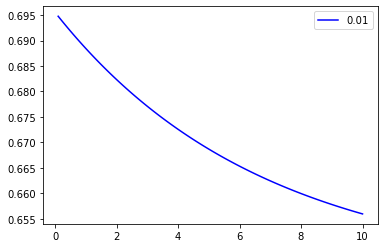

In [37]:
color=["blue","orange","green"]
count=0
learning_rates=[0.01]
for rate in learning_rates:
    parameters=initialize_parameters(layer_dim)
    number_of_iteration=[]
    costs=[]
    print("Data for learning rate : "+str(rate))
    for iteration in range(1,101):
        (AL,cache)= forward_propagation(train_X,parameters)
        #if (iteration==5):
            #print(AL)
        cost = calculate_cost(AL,train_Y)
        grads = backward_propagation(AL,train_X,train_Y,cache,parameters)
        parameters=update_parameter(grads,parameters,learning_rate=rate)
        if (iteration%100==0):
            print("Cost after iteration "+str(iteration)+" : "+str(cost))
        number_of_iteration.append(iteration/10)
        costs.append(np.squeeze(cost))
    plt.plot(number_of_iteration,costs,color=color[count])
    count+=1
    (AL,cache)= forward_propagation(train_X,parameters)
    #print(AL)
    pr = prediction(AL)
    train_accuracy = np.average(pr==train_Y)*100
    print("Train Accuracy : "+str(train_accuracy))
    (AL,cache)= forward_propagation(test_X,parameters)
    pr = prediction(AL)
    print(AL)
    #print(pr)
    #print(test_Y)
    test_accuracy = np.average(pr==test_Y)*100
    print("Test Accuracy : "+str(test_accuracy))
plt.legend(learning_rates, loc ="upper right")
plt.show()

In [6]:
print(sigmoid(np.array([[.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0]])))

[[0.52497919 0.549834   0.57444252 0.59868766 0.62245933 0.64565631
  0.66818777 0.68997448 0.7109495  0.73105858]]
